# Exercise 9.1: Demostrate the magic of inheritance

In [1]:
class Line:
    def draw(self):
        pass
    
class Parabola(Line):
    pass

In [2]:
dir(Parabola)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'draw']

# Exercise 9.2: Make polynomial subclasses of parabolas

In [3]:
class Parabola(object):
    def __init__(self, c0, c1, c2):
        self.c0 = c0
        self.c1 = c1
        self.c2 = c2
        
    def __call__(self, x):
        print("in ")
        return self.c2*x**2 + self.c1*x + self.c0
    
    def table(self, L, R, n):
        """Return a table with n points for L <= x <= R."""
        s = ""
        import numpy as np
        for x in np.linspace(L, R, n):
            y = self(x)
            s += "%12g %12g\n" % (x, y)
        return s

In [4]:
class Cubic(Parabola):
    def __init__(self, c0, c1, c2, c3):
        super().__init__(c0, c1, c2)
        self.c3 = c3
        
    def __call__(self, x):
        return super().__call__(x) + (self.c3 * x**3)

In [5]:
print(Cubic(1, 2, 3, 4).table(0, 5, 10))

in 
in 
in 
in 
in 
in 
in 
in 
in 
in 
           0            1
    0.555556      3.72291
     1.11111      12.4129
     1.66667      31.1852
     2.22222       64.155
     2.77778      115.438
     3.33333      189.148
     3.88889      289.402
     4.44444      420.314
           5          586



In [6]:
class Parabola(object):
    def __init__(self, c0, c1, c2):
        self.c0 = c0
        self.c1 = c1
        self.c2 = c2
        
    def __call__(self, x):
        print("Parabola.__call__")
        return self.c2*x**2 + self.c1*x + self.c0
    
    def table(self, L, R, n):
        """Return a table with n points for L <= x <= R."""
        s = ""
        import numpy as np
        for x in np.linspace(L, R, n):
            y = self(x)
            s += "%12g %12g\n" % (x, y)
        return sv

In [7]:
class Cubic(Parabola):
    def __init__(self, c0, c1, c2, c3):
        super().__init__(c0, c1, c2)
        self.c3 = c3
        
    def __call__(self, x):
        print("Cubic.__call__")
        return super().__call__(x) + (self.c3 * x**3)

In [8]:
class Poly4(Cubic):
    def __init__(self, c0, c1, c2, c3, c4):
        super().__init__(c0, c1, c2, c3)
        self.c4 = c4
        
    def __call__(self, x):
        print("Poly4.__call__")
        return super().__call__(x) + (self.c4 * x**4)

In [9]:
Poly4(1, 2, 3, 4, 5)(0.4)

Poly4.__call__
Cubic.__call__
Parabola.__call__


2.6640000000000006

# Exercise 9.3: Implement a class for a function as a subclass

In [10]:
class F(Parabola):
    def __init__(self, A, omega, c0, c1, c2):
        super().__init__(c0, c1, c2)
        self.A, self.omega = A, omega
        
    def __call__(self, x):
        from math import sin
        return self.A*sin(self.omega * x) + super().__call__(x)

In [11]:
f = F(1, 2, 3, 4, 5)
f(22.2)

Parabola.__call__


2556.4056618765553

In [12]:
import math
import numpy as np

%timeit math.sin(2.415123452)
%timeit np.sin(2.415123452)

152 ns ± 2.3 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
1.59 µs ± 21.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# Exercise 9.4: Create an alternative class hierarchy for polynomials

In [13]:
class Polynomial(object):
    def __init__(self, coefficients):
        self.coeff = coefficients
    
    def __call__(self, x):
        """Evaluate the polynomial."""
        s=0
        for i in range(len(self.coeff)):
            s += self.coeff[i]*x**i
        return s
    
    def __add__(self, other):
        """Return self + other as Polynomial object."""
        if len(self.coeff) > len(other.coeff):
            result_coeff = self.coeff[:]  # copy!
            for i in range(len(other.coeff)):
                result_coeff[i] += other.coeff[i]
        else:
            result_coeff = other.coeff[:] # copy!
            for i in range(len(self.coeff)):
                result_coeff[i] += self.coeff[i]
        return Polynomial(result_coeff)

In [14]:
class Parabola(Polynomial):
    def __init__(self, a, b, c):
        super().__init__([a, b, c])
        
class Line(Parabola):
    def __init__(self, a, b):
        super().__init__(a, b, 0)
        del self.coeff[2]

In [15]:
Line(1, 2)(4)

9

# Exercise 9.5: Make circle a subclass of an ellipse

In [16]:
class Ellipse:
    from math import pi, sqrt
    
    def __init__(self, pos, a, b):
        self.pos, self.a, self.b = pos, a, b

    def area(self):
        return pi * self.a * self.b
    
    def circumference(self):
        return pi * (3/2*(a + b) - sqrt(a * b))
    
class Circle(Ellipse):
    def __init__(self, pos, R):
        super().__init__(pos, R, R)

# Exercise 9.6: Make super- and subclass for a point

In [17]:
class Point:
    def __init__(self, x, y):
        self.x, self.y = x, y
        
    def __str__(self):
        return "%g, %g" % (self.x, self.y)
    
class PolarPoint(Point):
    from math import sin, cos
    
    def __init__(self, r, theta):
        self.r, self.theta = r, theta
        super().__init__(r * cos(theta), r * sin(theta))

# Exercise 9.7: Modify a function class by subclassing

In [18]:
from math import exp, sin
class F:
    def __init__(self, a, b):
        self.a, self.b = a, b
        
    def __call__(self, t):
        return exp(-self.a * t) * sin(self.b * t)

In [19]:
class Fb(F):
    def __init__(self, a, t):
        self.a, self.t = a, t
        
    def __call__(self, b):
        self.b = b
        return super().__call__(self.t)

In [20]:
Fb(t=2, a=4.5)(3)

-3.4482611891511404e-05

# Exercise 9.8: Explore the accuracy of difference formulas

In [21]:
from package.Diff2 import *

In [22]:
mu = 1
v = lambda x: (1 - exp(x / mu)) / (1 - exp(1 / mu))
dvdx = lambda x: exp(x / mu) / (mu * (exp(1 / mu) - 1))

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

x = np.linspace(-0.2, 1.005, 200)
plt.plot(x, [v(x) for x in x], label="$\mu = 1$")
mu = 0.01
plt.plot(x, [v(x) for x in x], label="$\mu = 0.01$")
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

In [24]:
from prettytable import PrettyTable
t = PrettyTable(["Method", "mu", "x", "Error"])
for method in Backward1, Forward1, Forward3, Central2, Central4, Central6:
    for mu in 1, 0.01:
        for x in 0, 0.9:
            t.add_row([method.__name__, mu, x, method(v, dfdx_exact=dvdx).error(x)])

print(t)

+-----------+------+-----+-------------------------+
|   Method  |  mu  |  x  |          Error          |
+-----------+------+-----+-------------------------+
| Backward1 |  1   |  0  |  2.909873501266702e-06  |
| Backward1 |  1   | 0.9 |  7.157121372003417e-06  |
| Backward1 | 0.01 |  0  |  1.859418130432611e-45  |
| Backward1 | 0.01 | 0.9 |  2.269240054773858e-06  |
|  Forward1 |  1   |  0  | -2.9098875877764385e-06 |
|  Forward1 |  1   | 0.9 | -7.1571506179424205e-06 |
|  Forward1 | 0.01 |  0  | -1.8606581558666612e-45 |
|  Forward1 | 0.01 | 0.9 | -2.2707533000347266e-06 |
|  Forward3 |  1   |  0  |  4.802269693016115e-12  |
|  Forward3 |  1   | 0.9 |  2.4234836359937617e-11 |
|  Forward3 | 0.01 |  0  |  3.1003034235195763e-52 |
|  Forward3 | 0.01 | 0.9 |  4.3220895612483545e-13 |
|  Central2 |  1   |  0  |  -7.043254868221993e-12 |
|  Central2 |  1   | 0.9 | -1.4622969501942862e-11 |
|  Central2 | 0.01 |  0  |  -6.200127167064711e-49 |
|  Central2 | 0.01 | 0.9 |  -7.566226300007028

In [25]:
from tabulate import tabulate
t = []
for method in Backward1, Forward1, Forward3, Central2, Central4, Central6:
    for mu in 1, 0.01:
        for x in 0, 0.9:
            t.append([method.__name__, mu, x, method(v, dfdx_exact=dvdx).error(x)])

print(tabulate(t, ["Method", "mu", "x", "Error"], tablefmt='orgtbl'))

| Method    |   mu |   x |        Error |
|-----------+------+-----+--------------|
| Backward1 | 1    | 0   |  2.90987e-06 |
| Backward1 | 1    | 0.9 |  7.15712e-06 |
| Backward1 | 0.01 | 0   |  1.85942e-45 |
| Backward1 | 0.01 | 0.9 |  2.26924e-06 |
| Forward1  | 1    | 0   | -2.90989e-06 |
| Forward1  | 1    | 0.9 | -7.15715e-06 |
| Forward1  | 0.01 | 0   | -1.86066e-45 |
| Forward1  | 0.01 | 0.9 | -2.27075e-06 |
| Forward3  | 1    | 0   |  4.80227e-12 |
| Forward3  | 1    | 0.9 |  2.42348e-11 |
| Forward3  | 0.01 | 0   |  3.1003e-52  |
| Forward3  | 0.01 | 0.9 |  4.32209e-13 |
| Central2  | 1    | 0   | -7.04325e-12 |
| Central2  | 1    | 0.9 | -1.4623e-11  |
| Central2  | 0.01 | 0   | -6.20013e-49 |
| Central2  | 0.01 | 0.9 | -7.56623e-10 |
| Central4  | 1    | 0   |  3.18701e-12 |
| Central4  | 1    | 0.9 |  1.31326e-11 |
| Central4  | 0.01 | 0   |  1.00683e-55 |
| Central4  | 0.01 | 0.9 |  5.3812e-14  |
| Central6  | 1    | 0   |  3.40239e-12 |
| Central6  | 1    | 0.9 |  1.5538

# Exercise 9.9: Implement a subclass    

In [26]:
class FuncWithDerivatives(object):
    def __init__(self, h=1.0E-5):
        self.h = h  # spacing for numerical derivatives

    def __call__(self, x):
        raise NotImplementedError\
        ("___call__ missing in class %s" % self.__class__.__name__)
    
    def df(self, x):
        """Return the 1st derivative of self.f."""
        # Compute first derivative by a finite difference
        h = self.h
        return (self(x+h) - self(x-h))/(2.0*h)
    
    def ddf(self, x):
        """Return the 2nd derivative of self.f."""
        # Compute second derivative by a finite difference:
        h = self.h
        return (self(x+h) - 2*self(x) + self(x-h))/(float(h)**2)

In [27]:
from math import sin
class Sine1(FuncWithDerivatives):
    def __call__(self, x):
        return sin(x)

In [28]:
from math import sin, cos
class Sine2:
    def __call__(self, x):
        return sin(x)
    
    def df(self, x):
        return cos(x)
    
    def ddf(self, x):
        return -sin(x)

In [29]:
print(tabulate([
    ["Sine1", 0.1, Sine1()(0.1)],
    ["Sine2", 0.1, Sine2()(0.1)],
    ["Sine1.df", 0.1, Sine1().df(0.1)],
    ["Sine2.df", 0.1, Sine2().df(0.1)],
    ["Sine1.ddf", 0.1, Sine1().ddf(0.1)],
    ["Sine2.ddf", 0.1, Sine2().ddf(0.1)],
    ["Sine1", 1.1, Sine1()(1.1)],
    ["Sine2", 1.1, Sine2()(1.1)],
    ["Sine1.df", 1.1, Sine1().df(1.1)],
    ["Sine2.df", 1.1, Sine2().df(1.1)],
    ["Sine1.ddf", 1.1, Sine1().ddf(1.1)],
    ["Sine2.ddf", 1.1, Sine2().ddf(1.1)]
], ["Method", "x", "f(x)"]))

Method       x        f(x)
---------  ---  ----------
Sine1      0.1   0.0998334
Sine2      0.1   0.0998334
Sine1.df   0.1   0.995004
Sine2.df   0.1   0.995004
Sine1.ddf  0.1  -0.0998333
Sine2.ddf  0.1  -0.0998334
Sine1      1.1   0.891207
Sine2      1.1   0.891207
Sine1.df   1.1   0.453596
Sine2.df   1.1   0.453596
Sine1.ddf  1.1  -0.891208
Sine2.ddf  1.1  -0.891207


In [30]:
["Sine1.df", 0.1, Sine1().df(0.1)]

['Sine1.df', 0.1, 0.9950041652613538]

# Exercise 9.10: Make classes for numerical differentiation

In [31]:
class Derivative:
    def __init__(self, f, h=1e-6):
        self.f, self.h = f, h

class Central(Derivative):
    def __call__(self, x):
        f, h = self.f, self.h
        return (f(x + h) - f(x - h)) / 2/h
    
    
class Forward(Derivative):
    def __call__(self, x):
        f, h = self.f, self.h
        return (f(x + h) - f(x)) / h
    
    
class Backward(Derivative):
    def __call__(self, x):
        f, h = self.f, self.h
        return (f(x) - f(x - h)) / h

# Exercise 9.11: Implement a new subclass for differentiation

In [32]:
from itertools import chain

class Backward2(Diff):
    def __call__(self, x):
        f, h = self.f, self.h
        return (f(x - 2*h) - 4*f(x - h) + 3*f(x)) / (2 * h)
    
print("Accuracy for (exp(-t))' at t=0:\n")
print(tabulate([(method.__name__, h, abs(-1 - method(lambda x: exp(-x), h=h)(0)))
                for method, h in zip(15*[Backward1, Backward2], 
                                     chain.from_iterable((2**(-k), 2**(-k)) for k in range(15)))
], ["Method", "h", "Error"]))

Accuracy for (exp(-t))' at t=0:

Method               h        Error
---------  -----------  -----------
Backward1  1            0.718282
Backward2  1            0.757964
Backward1  0.5          0.297443
Backward2  0.5          0.123397
Backward1  0.25         0.136102
Backward2  0.25         0.0252392
Backward1  0.125        0.0651876
Backward2  0.125        0.00572642
Backward1  0.0625       0.0319113
Backward2  0.0625       0.00136494
Backward1  0.03125      0.015789
Backward2  0.03125      0.000333263
Backward1  0.015625     0.00785335
Backward2  0.015625     8.23409e-05
Backward1  0.0078125    0.00391644
Backward2  0.0078125    2.04647e-05
Backward1  0.00390625   0.00195567
Backward2  0.00390625   5.10119e-06
Backward1  0.00195312   0.000977199
Backward2  0.00195312   1.27343e-06
Backward1  0.000976562  0.00048844
Backward2  0.000976562  3.18124e-07
Backward1  0.000488281  0.00024418
Backward2  0.000488281  7.95017e-08
Backward1  0.000244141  0.00012208
Backward2  0.000244141  1.9

# Exercise 9.12: Understand if a class can be used recursively

In [33]:
f = lambda x: x**4
ddf = Central2(Central2(f).__call__)(2)
ddf

48.00000397171544

In [34]:
12 * 2**2

48

# Exercise 9.13: Represent people by a class hierarchy

In [35]:
class Person:
    def __init__(self, name, birthday="", **kwargs):
        self.name, self.birthday = name, birthday
        
class Worker(Person):
    def __init__(self, name, company="", **kwargs):
        super().__init__(name, **kwargs)
        self.company = company
        
class Scientist(Worker):
    def __init__(self, name, area="", **kwargs):
        super().__init__(name, **kwargs)
        self.area = area
        
s = Scientist(name="Anthony", birthday="1971-01-11", company="Grocery Store", area="Logistics")
print(tabulate([(a, eval('s.' + a)) for a in s.__dir__()[:4]]))

--------  -------------
name      Anthony
birthday  1971-01-11
company   Grocery Store
area      Logistics
--------  -------------


# Exercise 9.14: Add a new class in a class hierarchy

In [36]:
class Integrator(object):
    def __init__(self, a, b, n):
        self.a, self.b, self.n = a, b, n
        self.points, self.weights = self.construct_method()

    def construct_method(self):
        raise NotImplementedError('no rule in class %s' %
                                  self.__class__.__name__)

    def integrate(self, f):
        s = 0
        for i in range(len(self.weights)):
            s += self.weights[i]*f(self.points[i])
        return s

    def vectorized_integrate(self, f):
        return np.dot(self.weights, f(self.points))
    
    
class MCint(Integrator):
    def construct_method(self):
        a, b, n = self.a, self.b, self.n
        h = (b - a) / n
        x = np.random.uniform(a, b, n)
        w = n*[h]
        return x, w

In [37]:
np.random.seed(0)
i = MCint(0, 1, 3)
print(i.points)
print(sum(f(p)/3 for p in i.points))
print(i.integrate(lambda x: 2*x))

[0.5488135  0.71518937 0.60276338]
0.16145042469863546
1.2445108309142587


In [38]:
from math import sin, pi
f = lambda x: sin(x)
print(tabulate([
    (n, abs(2 - MCint(0, pi, n).integrate(f))) for n in [1, 10, 100, 1000, 10000, 100000, 1000000]
], ["n", "Error"]))

      n        Error
-------  -----------
      1  1.11041
     10  0.21277
    100  0.0293739
   1000  0.0328792
  10000  0.00193093
 100000  0.0036776
1000000  9.35153e-06


# Exercise 9.15: Compute convergence rates of numerical integration methods

In [39]:
from package.integrate import *

In [40]:
from math import pi, sin, log

t = []
for Method in Midpoint, Trapezoidal:
    for n in [2**k + 1 for k in range(2, 12)]:
        E1 = abs(2 - Method(0, pi, n).integrate(sin))
        E2 = abs(2 - Method(0, pi, n - 1).integrate(sin))
        r = log(E2 / E1) / log((n - 1) / n)
        C = E1 / n**r
        t.append([Method.__name__, n, r, C])
for Method in Simpson,:
    for n in [2**k + 1 for k in range(2, 12)]:
        E1 = abs(2 - Method(0, pi, n).integrate(sin))
        E2 = abs(2 - Method(0, pi, n - 2).integrate(sin))
        r = log(E2 / E1) / log((n - 1) / n)
        C = E1 / n**r
        t.append([Method.__name__, n, r])
        
print(tabulate(t, ["Method", "n", "r", "C"]))

Method          n          r         C
-----------  ----  ---------  --------
Midpoint        5   -2.02938  0.872319
Midpoint        9   -2.00804  0.840112
Midpoint       17   -2.00212  0.828246
Midpoint       33   -2.00055  0.824255
Midpoint       65   -2.00014  0.822998
Midpoint      129   -2.00003  0.822621
Midpoint      257   -2.00001  0.82251
Midpoint      513   -2        0.822479
Midpoint     1025   -2        0.82247
Midpoint     2049   -2        0.822467
Trapezoidal     5   -2.61526  6.99074
Trapezoidal     9   -2.27413  3.81205
Trapezoidal    17   -2.13058  2.69004
Trapezoidal    33   -2.06384  2.18724
Trapezoidal    65   -2.03158  1.93591
Trapezoidal   129   -2.01571  1.80328
Trapezoidal   257   -2.00783  1.73146
Trapezoidal   513   -2.00391  1.69217
Trapezoidal  1025   -2.00195  1.67063
Trapezoidal  2049   -2.00097  1.65878
Simpson         5  -13.5797
Simpson         9   -9.89354
Simpson        17   -8.83364
Simpson        33   -8.39449
Simpson        65   -8.19221
Simpson   

# Exercise 9.16: Add common functionality in a class hierarchy

In [41]:
import numpy as np
import math

class Integrator(object):
    def __init__(self, a, b, n):
        self.a, self.b, self.n = a, b, n
        self.points, self.weights = self.construct_method()

    def construct_method(self):
        raise NotImplementedError('no rule in class %s' %
                                  self.__class__.__name__)

    def integrate(self, f):
        s = 0
        for i in range(len(self.weights)):
            s += self.weights[i]*f(self.points[i])
        return s

    def vectorized_integrate(self, f):
        return np.dot(self.weights, f(self.points))
    
    def int_function(self, f, x):
        self.b = x
        self.points, self.weights = self.construct_method()
        return self.integrate(f)


class Midpoint(Integrator):
    def construct_method(self):
        a, b, n = self.a, self.b, self.n  # quick forms
        h = (b-a)/float(n)
        x = np.linspace(a + 0.5*h, b - 0.5*h, n)
        w = np.zeros(len(x)) + h
        return x, w

class Trapezoidal(Integrator):
    def construct_method(self):
        x = np.linspace(self.a, self.b, self.n)
        h = (self.b - self.a)/float(self.n - 1)
        w = np.zeros(len(x)) + h
        w[0] /= 2
        w[-1] /= 2
        return x, w

class Simpson(Integrator):
    def construct_method(self):
        if self.n % 2 != 1:
            print('n=%d must be odd, 1 is added' % self.n)
            self.n += 1
        x = np.linspace(self.a, self.b, self.n)
        h = (self.b - self.a)/float(self.n - 1)*2
        w = np.zeros(len(x))
        w[0:self.n:2] = h*1.0/3
        w[1:self.n-1:2] = h*2.0/3
        w[0] /= 2
        w[-1] /= 2
        return x, w


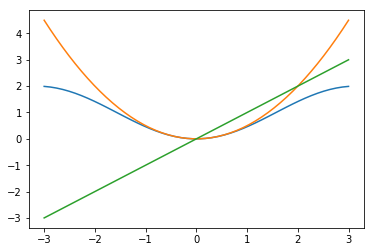

In [42]:
plt.figure()

x = np.linspace(-3, 3)

plt.plot(x, [Midpoint(0, 1, 50).int_function(sin, x) for x in x])
plt.plot(x, [Trapezoidal(0, 1, 50).int_function(lambda x: x, x) for x in x])
plt.plot(x, [Simpson(0, 1, 51).int_function(lambda x: 1, x) for x in x])

plt.show()

# Exercise 9.17: Make a class hierarchy for root finding

In [43]:
class Rootfinder:
    def __init__(self, f, dfdx=None):
        self.f = f
        self.df = dfdx if dfdx else Central2(f)
        
    def solve(self, start_values=[0], max_iter=100, tolerance=1e-6):
        pass
    

class Newton(Rootfinder):
    def solve(self, start_values=[0], max_iter=100, tolerance=1e-6):
        f, x, dfdx, epsilon, N = self.f, start_values[0], self.df, tolerance, max_iter
        f_value = f(x)
        n = 0
        info = [(x, f_value)]
        
        while abs(f_value) > epsilon and n <= N:
            dfdx_value = float(dfdx(x))
            
            if abs(dfdx_value) < 1E-14:
                raise ValueError("Newton: f'(%g)=%g" % (x, dfdx_value))

            x = x - f_value/dfdx_value

            n += 1
            f_value = f(x)
            info.append((x, f_value))
            
        return x, f_value, f_value < tolerance, info

In [44]:
Newton(lambda x: (x - 3)**2 - 6).solve()

(0.5505102040816306,
 2.603082140950619e-07,
 True,
 [(0, 3),
  (0.49999999999672445, 0.250000000016378),
  (0.5499999999992284, 0.002500000003780478),
  (0.5505102040816306, 2.603082140950619e-07)])

# Exercise 9.18: Make a calculus calculator class

In [45]:
class MinMax:
    import numpy as np
    
    def __init__(self, f, a, b, n):
        self.__dict__.update({k: v for k, v in locals().items() if k != 'self'})
        self._find_extrema()
        
    def _find_extrema(self):
        f, a, b = self.f, self.a, self.b
        
        self.Pmin, self.Pmax, self.Fmin, self.Fmax = Pmin, Pmax, Fmin, Fmax = [], [], [], []
        
        x = np.linspace(a, b, self.n)
        for i, xi in enumerate(x[1:-1]):
            if f(x[i]) < f(xi) > f(x[i + 2]):
                Pmax.append(xi)
                Fmax.append(f(xi))
            elif f(x[i]) > f(xi) < f(x[i + 2]):
                Pmin.append(xi)
                Fmin.append(f(xi))
                
        if f(a) > f(x[1]):
            Pmax.insert(1, a)
            Fmax.insert(1, f(a))
        elif f(a) < f(x[1]):
            Pmin.insert(1, a)
            Fmin.insert(1, f(a))
        if f(b) > f(x[-2]):
            Pmax.append(b)
            Fmax.append(f(b))
        elif f(b) < f(x[-2]):
            Pmin.append(b)
            Fmin.append(f(b))
                    
    def _refine_extrema(self):
        f, a, b, n = self.f, self.a, self.b, self.n
        Pmin, Pmax, Fmin, Fmax = self.Pmin, self.Pmax, self.Fmin, self.Fmax
        for i, p in enumerate(Pmin):
            if p != a and p != b:
                df = Derivative(f, h= (b - a) / n**2 / 1000)
                xmin, dfmin = p, df(p)
                for x in np.linspace(p - (b - a)/n, p + (b - a)/n, n):    # just reuse `n` as precision basis
                    if df(x) < dfmin:
                        xmin, dfmin = x, df(x)
                Pmin[i] = xmin
                Fmin[i] = f(xmin)
                
        for i, p in enumerate(Pmax):
            if p != a and p != b:
                df = Derivative(f, h= (b - a) / n**2 / 1000)
                xmax, dfmin = p, df(p)
                for x in np.linspace(p - (b - a)/n, p + (b - a)/n, n):    # just reuse `n` as precision basis
                    if df(x) < dfmin:
                        xmax, dfmin = x, df(x)
                Pmax[i] = xmax
                Fmax[i] = f(xmax)
                
    
    def get_global_minimum(self):
        return min(self.get_all_minima(), key=lambda t: t[1])
            
    def get_global_maximum(self):
        return max(self.get_all_maxima(), key=lambda t: t[1])
    
    def get_all_minima(self):
        return [(x, y) for x, y in zip(self.Pmin, self.Fmin)]
    
    def get_all_maxima(self):
        return [(x, y) for x, y in zip(self.Pmax, self.Fmax)]
    
    def __str__(self):
        from textwrap import dedent as dd
        return dd(f"""
        All minima: {', '.join(f'{p:.4f}' for p, v in self.get_all_minima())}
        All maxima: {', '.join(f'{p:.4f}' for p, v in self.get_all_maxima())}
        Global minimum: {self.get_global_minimum()[0]}
        Global maximum: {self.get_global_maximum()[0]}
        """)

In [46]:
import numpy as np

class CalculusCalculator:
    def __init__(self, f, a, b, resolution=100):
        self.f, self.a, self.b, self.resolution = f, a, b, resolution
        self.set_integration_method(Trapezoidal)
        self.set_differentiation_method(Central2)
        
    def plot(self):
        import matplotlib.pyplot as plt
        plt.figure()
        x = np.linspace(self.a, self.b, self.resolution)
        plt.plot(x, [self.f(x) for x in x])
        plt.show()
        
    def plot_derivative(self):
        import matplotlib.pyplot as plt
        plt.figure()
        x = np.linspace(self.a, self.b, self.resolution)
        plt.plot(x, [self.df(x) for x in x])
        plt.show()
        
    def set_differentiation_method(self, method):
        self.diff_method = method
        
    def set_integration_method(self, method):
        self.int_method = Trapezoidal
        self.integral = method(self.a, self.b, self.resolution).integrate(self.f)
        
    def df(self, x):
        return self.diff_method(self.f)(x)
    
    def extreme_points(self):
        print(MinMax(f=self.f, a=self.a, b=self.b, n=self.resolution))

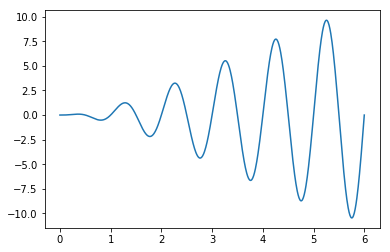

In [47]:
c = CalculusCalculator(lambda x: x**2 * exp(-0.2 * x) * sin(2 * pi * x), 0, 6, 700)
c.plot()

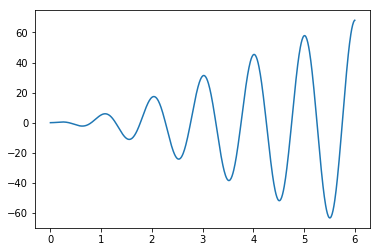

In [48]:
c.plot_derivative()

In [49]:
c.extreme_points()


All minima: 0.8069, 0.0000, 1.7768, 2.7639, 3.7597, 4.7554, 5.7511
All maxima: 0.3605, 1.2876, 2.2661, 3.2618, 4.2575, 5.2532, 6.0000
Global minimum: 5.75107296137339
Global maximum: 5.253218884120171



In [50]:
c.integral

-1.7349674573087768

In [51]:
c.df(2.51)

-24.05698904775627

# Exercise 9.19: Compute inverse functions

In [52]:
class CalculusCalculator:
    def __init__(self, f, a, b, resolution=100):
        self.f, self.a, self.b, self.resolution = f, a, b, resolution
        self.set_integration_method(Trapezoidal)
        self.set_differentiation_method(Central2)
        
    def plot(self):
        import matplotlib.pyplot as plt
        plt.figure()
        x = np.linspace(self.a, self.b, self.resolution)
        plt.plot(x, [self.f(x) for x in x])
        plt.show()
        
    def plot_derivative(self):
        import matplotlib.pyplot as plt
        plt.figure()
        x = np.linspace(self.a, self.b, self.resolution)
        plt.plot(x, [self.df(x) for x in x])
        plt.show()
        
    def set_differentiation_method(self, method):
        self.diff_method = method
        
    def set_integration_method(self, method):
        self.int_method = Trapezoidal
        self.integral = method(self.a, self.b, self.resolution).integrate(self.f)
        
    def df(self, x):
        return self.diff_method(self.f)(x)
    
    def extreme_points(self):
        print(MinMax(f=self.f, a=self.a, b=self.b, n=self.resolution))
        
    def inverse(self, x, h=1e-6):
        def Newton(f, x, dfdx, epsilon=1.0E-7, N=100, store=False):
            f_value = f(x)
            n = 0
            if store: info = [(x, f_value)]
            while abs(f_value) > epsilon and n <= N:
                dfdx_value = float(dfdx(x))
                if abs(dfdx_value) < 1E-14:
                    raise ValueError("Newton: f'(%g)=%g" % (x, dfdx_value))

                x = x - f_value/dfdx_value

                n += 1
                f_value = f(x)
                if store: info.append((x, f_value))
            if store:
                return x, info
            else:
                return x, n, f_value

        
        def F(gamma):
            return f(gamma) - xi

        def dFdx(gamma):
            return (F(gamma+h) - F(gamma-h))/(2*h)

        g = np.zeros(len(x))

        for i in range(len(x)):
            xi = x[i]

            # Compute start value (use last g[i-1] if possible)
            if i == 0:
                gamma0 = x[0]
            else:
                gamma0 = g[i-1]

            gamma, n, F_value = Newton(F, gamma0, dFdx)
            g[i] = gamma

        return g

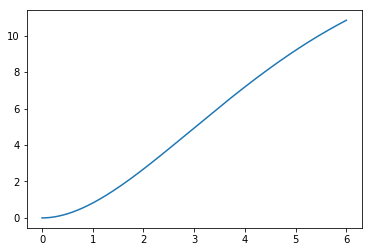

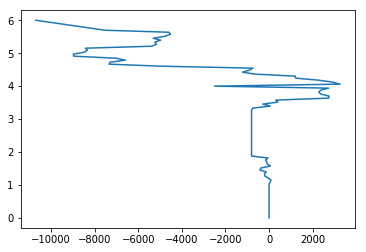

In [53]:
c = CalculusCalculator(lambda x: x**2 * exp(-0.2 * x), 0, 6, 700)
c.plot()
x = np.linspace(0, 6, 100)
plt.plot(c.inverse(x), x)    # i don't know but this does not look right..

# Exercise 9.22: Animate a person with waving hands

In [54]:
%%capture

fig, ax = plt.subplots(figsize=(3, 6))
plt.axis([-1.5, 1.5, -0.5, 5.5])
ax.add_artist(plt.Circle((0, 4.5), 0.5, fill=False, lw=2))
plt.plot([-1, 0, 1, 0, 0, 0, -1, 0, 1], [2, 3.5, 4, 3.5, 4, 1.5, 0, 1.5, 0], 'k', lw=2)
ln, = plt.plot([1, 1.1], [4, 4.7], 'k', lw=2)

from matplotlib.animation import FuncAnimation
from math import sin, cos, sqrt, pi

l = sqrt(2) / 2

def draw(theta):
    ln.set_data([1, 1 + l*cos(theta)], [4, 4 + l*sin(theta)])
    return ln,

a = FuncAnimation(fig, draw, np.r_[np.linspace(0.5*pi/2, 1.1*pi/2), np.linspace(1.1*pi/2, 0.5*pi/2)], interval=15, blit=True)

In [55]:
from IPython.display import HTML
HTML(a.to_html5_video())